In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

In [2]:
wisc = pd.read_csv("E:/Python Programs/wisc_bc_data.csv")
wisc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [3]:
X_1 = wisc[["radius_mean", "concave points_mean", "radius_worst", "concave points_worst"]]
y_1 = wisc["diagnosis"]

In [4]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,y_1, test_size=125, random_state=10)

In [5]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_1_train, y_1_train)
model.score(X_1_train, y_1_train), model.score(X_1_test, y_1_test)

(1.0, 0.944)

In [6]:
X = wisc[["texture_mean"]]
y = wisc["diagnosis"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=125, random_state=10)

In [8]:
# this is overfitting model because if you observe, the training accuracy is ≈95.7%, but the testing accuracy
# is ≈58%

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9572072072072072, 0.584)

In [9]:
model.get_depth(), model.get_n_leaves()

(53, 163)

In [10]:
# Restricticting max-depth to 10 like a trial & error.

model = DecisionTreeClassifier(criterion='entropy', max_depth=10)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8108108108108109, 0.672)

In [11]:
accuracy_train = []
accuracy_test = []

for i in range(1,15):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    model.fit(X_train, y_train)
    accuracy_train.append(model.score(X_train, y_train))
    accuracy_test.append(model.score(X_test, y_test))

print(accuracy_train)
print(accuracy_test)
    

[0.7162162162162162, 0.740990990990991, 0.7432432432432432, 0.7567567567567568, 0.7657657657657657, 0.7747747747747747, 0.7882882882882883, 0.7927927927927928, 0.795045045045045, 0.8108108108108109, 0.8198198198198198, 0.8445945945945946, 0.8536036036036037, 0.8693693693693694]
[0.68, 0.712, 0.704, 0.696, 0.696, 0.696, 0.664, 0.664, 0.672, 0.672, 0.624, 0.64, 0.64, 0.672]


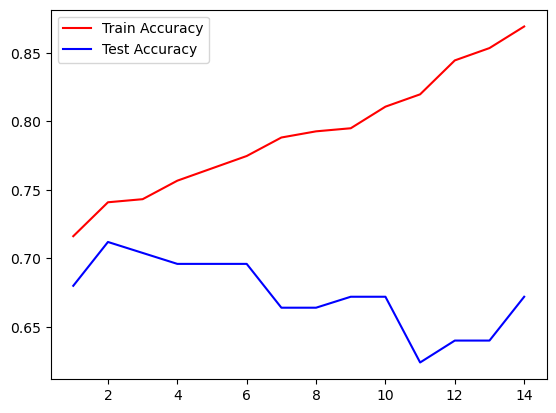

In [12]:
plt.plot(range(1,15), accuracy_train, c="red", label="Train Accuracy")
plt.plot(range(1,15), accuracy_test, c="blue", label="Test Accuracy")
plt.legend()
plt.show()

In [13]:
# We can see that testing accuracy looks better at x=2 from above plot, therefore we set max-depth=2 like a trial & error.

model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.740990990990991, 0.712)

In [14]:
# Checking accuracy scores with KFold Cross Validation technique.

accuracy_train = []
accuracy_test = []
temp_train = []
temp_test = []

kf = KFold(n_splits=4)

for i in range(1,15):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    for ix_train, ix_test in kf.split(X):
        X_train, X_test, y_train, y_test = X.iloc[ix_train], X.iloc[ix_test], y.iloc[ix_train], y.iloc[ix_test]
        model.fit(X_train, y_train)
        temp_train.append(model.score(X_train, y_train))
        temp_test.append(model.score(X_test, y_test))
        print(X_train.shape, X_test.shape)
    accuracy_train.append(np.mean(temp_train))
    accuracy_test.append(np.mean(temp_test))

print(accuracy_train)
print(accuracy_test)

(426, 1) (143, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(426, 1) (143, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(426, 1) (143, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(426, 1) (143, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(426, 1) (143, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(426, 1) (143, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(426, 1) (143, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(426, 1) (143, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(426, 1) (143, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(426, 1) (143, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(426, 1) (143, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(426, 1) (143, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(426, 1) (143, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(426, 1) (143, 1)
(427, 1) (142, 1)
(427, 1) (142, 1)
(427, 1) (

In [15]:
len(accuracy_train)

14

In [16]:
len(temp_train)

56

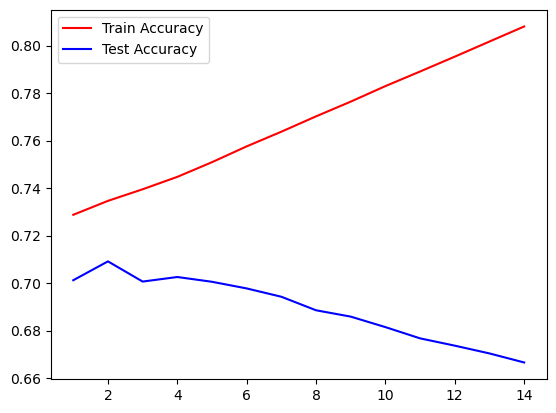

In [17]:
plt.plot(range(1,15), accuracy_train, c="red", label="Train Accuracy")
plt.plot(range(1,15), accuracy_test, c="blue", label="Test Accuracy")
plt.legend()
plt.show()

In [18]:
# Instead of manually doing all those calaculations that we did above to check the best parameters,
# we can simply use this function called "GridSearchCV".

model_tune = GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
                         param_grid={"max_depth":range(1,15), "max_leaf_nodes":range(2,30)}, 
                         cv=4)
model_tune.fit(X, y)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': range(1, 15),
                         'max_leaf_nodes': range(2, 30)})

In [19]:
# max_depth (14) * max_leaf_nodes (28)
# 14*28 = 392 combinations model has to check and do the tuning to give the best parameters.

14*28

392

In [20]:
model_tune.best_params_

{'max_depth': 1, 'max_leaf_nodes': 2}

In [21]:
results = model_tune.cv_results_
type(results)

dict

In [22]:
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_leaf_nodes', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [23]:
results["mean_test_score"]

array([0.71529351, 0.71529351, 0.71529351, 0.71529351, 0.71529351,
       0.71529351, 0.71529351, 0.71529351, 0.71529351, 0.71529351,
       0.71529351, 0.71529351, 0.71529351, 0.71529351, 0.71529351,
       0.71529351, 0.71529351, 0.71529351, 0.71529351, 0.71529351,
       0.71529351, 0.71529351, 0.71529351, 0.71529351, 0.71529351,
       0.71529351, 0.71529351, 0.71529351, 0.71529351, 0.71529351,
       0.71521964, 0.71521964, 0.71521964, 0.71521964, 0.71521964,
       0.71521964, 0.71521964, 0.71521964, 0.71521964, 0.71521964,
       0.71521964, 0.71521964, 0.71521964, 0.71521964, 0.71521964,
       0.71521964, 0.71521964, 0.71521964, 0.71521964, 0.71521964,
       0.71521964, 0.71521964, 0.71521964, 0.71521964, 0.71521964,
       0.71521964, 0.71529351, 0.71529351, 0.70473013, 0.71521964,
       0.71347139, 0.71172314, 0.70996257, 0.70996257, 0.70996257,
       0.70996257, 0.70996257, 0.70996257, 0.70996257, 0.70996257,
       0.70996257, 0.70996257, 0.70996257, 0.70996257, 0.70996

In [24]:
len(results["mean_test_score"])

392

In [25]:
model_tune = GridSearchCV(estimator=KNeighborsClassifier(),
                         param_grid={"n_neighbors": range(1,12,2), "weights": ["uniform", "distance"],"p":[1,2],
                                    "algorithm": ['ball_tree', 'kd_tree', 'brute']}, 
                         cv=4)
model_tune.fit(X, y)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 12, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [26]:
# n_neighbors (6) * weights (2) * p (2) * algorithm (3)
# 6*2*2*3 = 72 combinations model has to check and do the tuning to give the best parameters.

6*2*2*3

72

In [27]:
model_tune.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=11, p=1)

In [28]:
model_tune.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

In [29]:
results = model_tune.cv_results_

In [30]:
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_algorithm', 'param_n_neighbors', 'param_p', 'param_weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [31]:
results["params"]

[{'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'unif

In [34]:
model_tune = RandomizedSearchCV(n_iter = 10, estimator = KNeighborsClassifier(),
                               param_distributions = {"n_neighbors": range(1,12,2), "weights": ["uniform", "distance"],
                                                      "p":[1,2],"algorithm": ['ball_tree', 'kd_tree', 'brute']},
                               cv = 4)

model_tune.fit(X,y)

RandomizedSearchCV(cv=4, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': range(1, 12, 2),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [36]:
model_tune.best_params_

{'weights': 'uniform', 'p': 2, 'n_neighbors': 11, 'algorithm': 'ball_tree'}

In [37]:
model_tune.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=11)

In [38]:
results["rank_test_score"]

array([67, 67, 67, 67, 26, 50, 26, 50, 21, 55, 21, 55, 10, 37, 10, 37, 15,
       43, 15, 43,  1, 31,  1, 31, 61, 61, 61, 61, 28, 50, 28, 50, 21, 55,
       21, 55,  5, 37,  5, 37, 15, 43, 15, 43,  1, 31,  1, 31, 61, 61, 71,
       71, 30, 50, 25, 49, 19, 55, 20, 55, 10, 37,  5, 37, 13, 43, 14, 43,
        8, 31,  8, 31])